# Entrega 1

### Integrantes:

* Chiabotto Lorenzo
* Bertone Matias
* Storani Gianfranco

### Dataset
[HR Analytics: Job Change of Data Scientists](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv)



#### Dataset sample

In [21]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./dataset/aug_train.csv')
train.sample(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
8109,28023,city_134,0.698,Male,No relevent experience,no_enrollment,Masters,STEM,12,500-999,NGO,1,157,0.0
8894,4080,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,11,100-500,Pvt Ltd,1,10,1.0
17463,9409,city_84,0.698,Other,Has relevent experience,no_enrollment,Graduate,STEM,4,50-99,Pvt Ltd,3,50,0.0
5992,8144,city_114,0.926,Male,Has relevent experience,Part time course,Graduate,STEM,9,10/49,Pvt Ltd,NaN,51,0.0
4583,25853,city_67,0.855,Male,Has relevent experience,no_enrollment,Masters,STEM,7,NaN,NaN,1,112,0.0
11037,6297,city_134,0.698,NaN,Has relevent experience,NaN,NaN,NaN,4,NaN,NaN,never,20,0.0
17285,19532,city_114,0.926,NaN,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Pvt Ltd,4,43,0.0
6064,22503,city_21,0.624,NaN,Has relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,NaN,72,0.0
18639,15262,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,9,10/49,Funded Startup,2,18,0.0
9469,22172,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,12,0.0


# 1. Listado de variables

* **enrollee_id** : ID unico para cada candidato. *(No se utiliza)*

* **city**: Codigo de la ciudad. *(Variable de entrada)*

* **city_development_index** : Indice de desarrollo de la ciudad. *(Variable de entrada)*

* **gender**: Genero. *(Variable de entrada)*

* **relevent_experience**: Si el candiato tiene experiencia relevante en el area de la nueva empresa. *(Variable de entrada)*

* **enrolled_university**: Tipo de curso universitario matriculado. *(Variable de entrada)*
 
* **education_level**: Nivel de educacion del candidato. *(Variable de entrada)*

* **major_discipline** :Disciplina principal del candidato. *(Variable de entrada)*

* **experience**: Experiencia total del candidato en años. *(Variable de entrada)*

* **company_size**: Cantidad de empleados actuales en la compania. *(Variable de entrada)*

* **company_type** : Tipo de compania. *(Variable de entrada)*

* **lastnewjob**: Diferencia en años entre su trabajo previo y el acutal. *(Variable de entrada)*

* **training_hours**: Horas de entrenamiento completadas. *(Variable de entrada)*

* **target**: 0 – No esta buscando un cambio de laburo, 1 – Esta buscando un cambio de laburo. *(Variable de salida)*

# 2.  Análisis detallado

### Balanceo

<AxesSubplot:ylabel='target'>

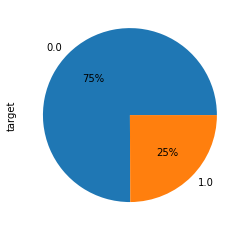

In [25]:
train.target.value_counts().plot.pie(autopct='%1.0f%%', figsize=(4,4))

Como se puede ver en el gráfico el dataset se encuentra altamente desbalanceado, ya que tiene una proporcion de 3 a 1 siendo el mayor de estos el valor 0 (La persona no esta buscando un cambio de trabajo).
Esto repercutira al momento de separar el dataset en test y train, ya que al tener un modelo tan desbalanceado podria darse el caso en el cual ambos dataset resultantes obtengan una distribucion muy diferente al original y por ende entre ellos mismos.


### Relacion variables de entrada / salida

In [48]:
train.city.value_counts().where()

SyntaxError: invalid syntax (<ipython-input-48-4b0d1985a43f>, line 1)

#### City

<AxesSubplot:title={'center':'# de personas por ciudad'}>

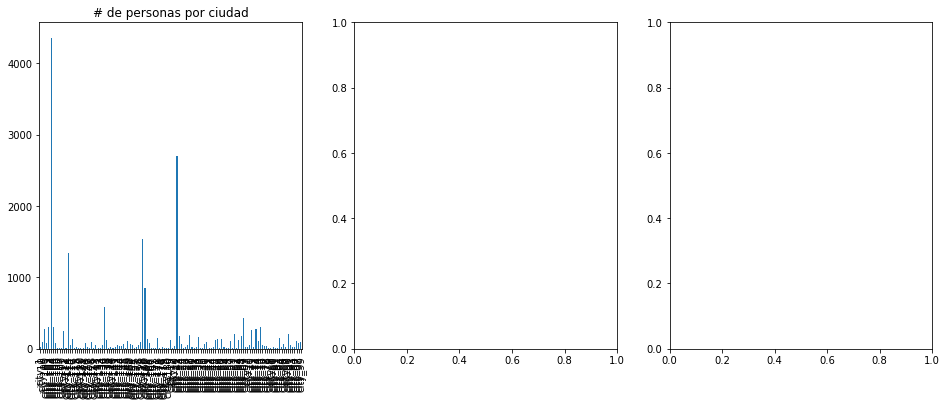

In [43]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# de personas por ciudad')
train.city.value_counts().sort_index().plot.bar(ax=ax[0])

#### City_index

In [ ]:
Something

#### Company_type

<AxesSubplot:title={'center':'% Personas buscando trabajo por tipo de empresa'}>

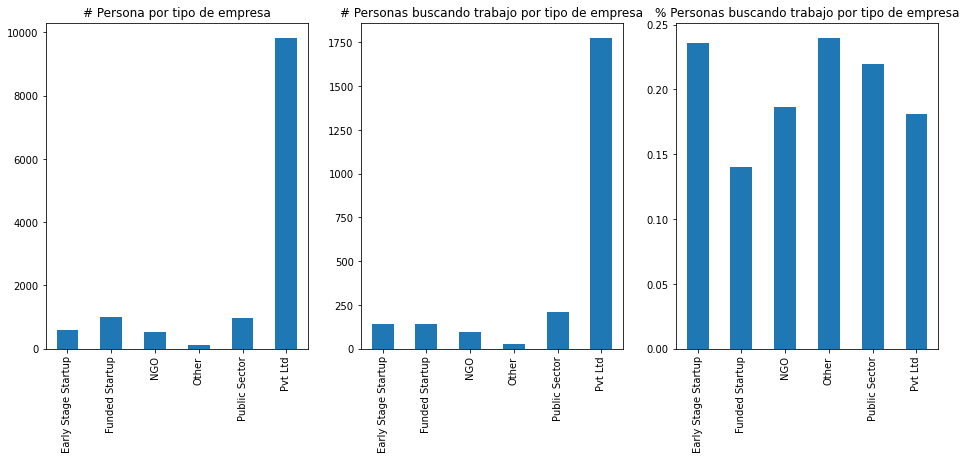

In [52]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# Persona por tipo de empresa')
train.company_type.value_counts().sort_index().plot.bar(ax=ax[0])

ax[1].set_title('# Personas buscando trabajo por tipo de empresa')
train[train.target == True].company_type.value_counts().sort_index().plot.bar(ax=ax[1])

ax[2].set_title('% Personas buscando trabajo por tipo de empresa')
(train[train.target == True].company_type.value_counts().sort_index() / train.company_type.value_counts().sort_index()).plot.bar(ax=ax[2])

#### Relevant_experience

<AxesSubplot:title={'center':'% Personas buscando trabajo por experiencia'}>

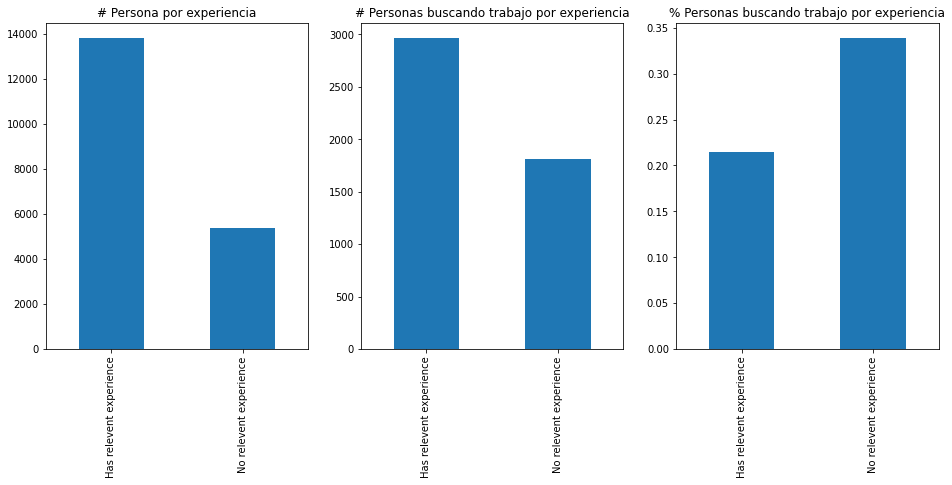

In [54]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# Persona por experiencia')
train.relevent_experience.value_counts().sort_index().plot.bar(ax=ax[0])

ax[1].set_title('# Personas buscando trabajo por experiencia')
train[train.target == True].relevent_experience.value_counts().sort_index().plot.bar(ax=ax[1])

ax[2].set_title('% Personas buscando trabajo por experiencia')
(train[train.target == True].relevent_experience.value_counts().sort_index() / train.relevent_experience.value_counts().sort_index()).plot.bar(ax=ax[2])

#### Experience

<AxesSubplot:title={'center':'% Personas buscando trabajo por experiencia'}>

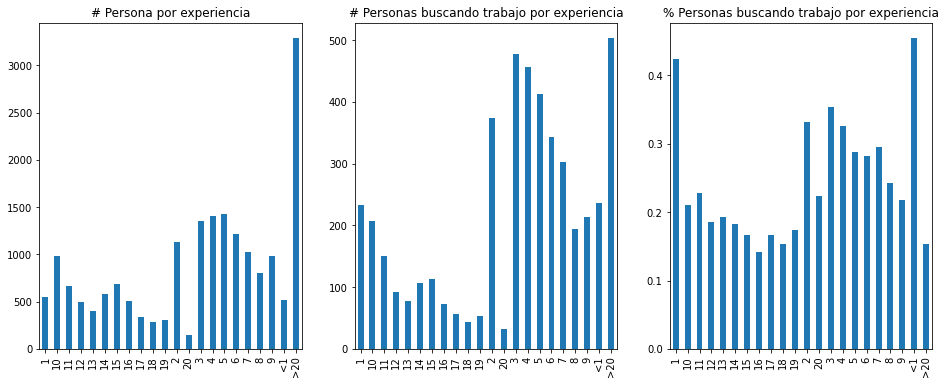

In [56]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# Persona por experiencia')
train.experience.value_counts().sort_index().plot.bar(ax=ax[0])

ax[1].set_title('# Personas buscando trabajo por experiencia')
train[train.target == True].experience.value_counts().sort_index().plot.bar(ax=ax[1])

ax[2].set_title('% Personas buscando trabajo por experiencia')
(train[train.target == True].experience.value_counts().sort_index() / train.experience.value_counts().sort_index()).plot.bar(ax=ax[2])